In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
enrollment = pd.read_csv("~/Desktop/chia2018/2017/datasheets/enrollment_by_employer_size.csv", thousands=",")
#Reading the dataset in a dataframe using Pandas
enrollment

,Funding Type,Employer Size,months_2014,months_2015,months_2016,members_2014,members_2015,members_2016
0,Fully-Insured,Individual,970943,2043684,2749178,80912,170307,229098
1,Fully-Insured,Small Group,6349102,6028363,5824470,532115,506004,490102
2,Fully-Insured,Mid-Size Group,3217153,3133378,3013864,269859,263890,252062
3,Fully-Insured,Large Group,5044308,4954396,4849841,424260,417217,411360
4,Fully-Insured,Jumbo Group,4334451,4387707,4444639,368722,375733,384653
5,Fully-Insured,GIC,621856,650576,675596,51821,54215,56300
6,Fully-Insured,Total,20537813,21198104,21557588,1727690,1787365,1823574


In [3]:
months = enrollment[enrollment.columns[1:5]]
mth_cols = ['months_2014','months_2015','months_2016']
months

,Employer Size,months_2014,months_2015,months_2016
0,Individual,970943,2043684,2749178
1,Small Group,6349102,6028363,5824470
2,Mid-Size Group,3217153,3133378,3013864
3,Large Group,5044308,4954396,4849841
4,Jumbo Group,4334451,4387707,4444639
5,GIC,621856,650576,675596
6,Total,20537813,21198104,21557588


In [4]:
premiums = pd.read_csv("~/Desktop/chia2018/2017/datasheets/premiums_by_employer_size.csv", thousands=",")
pre_cols = ['agg_premiums_2014','agg_premiums_2015','agg_premiums_2016', 'pmpm_2014','pmpm_2015','pmpm_2016']
premiums[pre_cols] = premiums[pre_cols].replace({'\$': '', ',': ''}, regex=True)
premiums[pre_cols] = premiums[pre_cols].apply(pd.to_numeric)

num = 7

agg_premiums = premiums[premiums.columns[1:5]]
agg_cols = ['agg_premiums_2014','agg_premiums_2015','agg_premiums_2016']
premiums

,Funding Type,Employer Size,agg_premiums_2014,agg_premiums_2015,agg_premiums_2016,pmpm_2014,pmpm_2015,pmpm_2016
0,Fully-Insured,Individual,4.369108e+08,7.758440e+08,1.008286e+09,449.99,379.63,366.76
1,Fully-Insured,Small Group,2.679492e+09,2.623830e+09,2.651911e+09,422.03,435.25,455.31
2,Fully-Insured,Mid-Size Group,1.417927e+09,1.436160e+09,1.437412e+09,440.74,458.34,476.93
3,Fully-Insured,Large Group,2.258229e+09,2.316765e+09,2.349204e+09,447.68,467.62,484.39
4,Fully-Insured,Jumbo Group,2.052645e+09,2.137371e+09,2.230836e+09,473.57,487.13,501.92
5,Fully-Insured,GIC,2.854738e+08,3.030735e+08,3.284381e+08,459.07,465.85,486.15
6,Fully-Insured,Total,9.130677e+09,9.593044e+09,1.000609e+10,444.58,452.54,464.16


In [5]:
pmpm = pd.DataFrame(columns = ['Employer Size','pmpm_2014','pmpm_2015','pmpm_2016'])
pmpm['Employer Size'] = enrollment['Employer Size']
pmpm['pmpm_2014'] = agg_premiums['agg_premiums_2014']/months['months_2014']
pmpm['pmpm_2015'] = agg_premiums['agg_premiums_2015']/months['months_2015']
pmpm['pmpm_2016'] = agg_premiums['agg_premiums_2016']/months['months_2016']
pmpm

,Employer Size,pmpm_2014,pmpm_2015,pmpm_2016
0,Individual,449.986019,379.630117,366.759053
1,Small Group,422.026918,435.247569,455.305149
2,Mid-Size Group,440.739601,458.342514,476.933215
3,Large Group,447.678661,467.618005,484.387772
4,Jumbo Group,473.565063,487.127196,501.916061
5,GIC,459.067298,465.854075,486.145769
6,Total,444.578827,452.542565,464.156123


In [6]:
cols = ['pmpm_2014','pmpm_2015','pmpm_2016']
loop_pmpm = pd.DataFrame(columns = ['Employer Size'] + cols)
for i in range(3):
    agg = agg_cols[i]
    mth = mth_cols[i]
    loop_pmpm[cols[i]] = agg_premiums[agg]/months[mth]
loop_pmpm['Employer Size'] = enrollment['Employer Size']

loop_pmpm

,Employer Size,pmpm_2014,pmpm_2015,pmpm_2016
0,Individual,449.986019,379.630117,366.759053
1,Small Group,422.026918,435.247569,455.305149
2,Mid-Size Group,440.739601,458.342514,476.933215
3,Large Group,447.678661,467.618005,484.387772
4,Jumbo Group,473.565063,487.127196,501.916061
5,GIC,459.067298,465.854075,486.145769
6,Total,444.578827,452.542565,464.156123


In [ ]:
loop_pmpm['pmpm_2016']

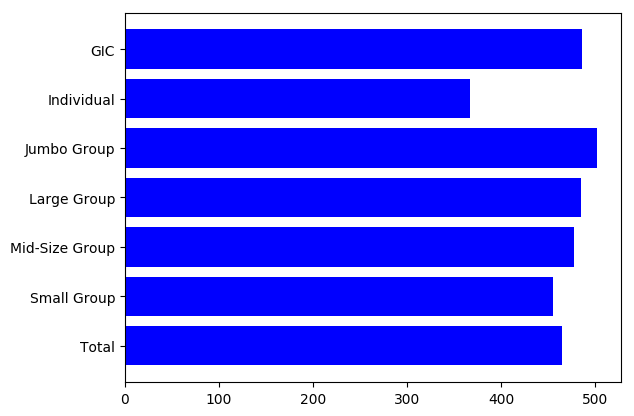

In [7]:


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
ax.barh(loop_pmpm['Employer Size'], loop_pmpm['pmpm_2016'], align='center',
        color='blue')
ax.set_yticks(loop_pmpm['Employer Size'])

ax.set_yticklabels(loop_pmpm['Employer Size'])
ax.invert_yaxis()  # labels read top-to-bottom

plt.show()